In [2]:
#0차원 텐서

import torch

x=torch.tensor(10)
print(x)
print(x.dim())

tensor(10)
0


In [3]:
#1차원 텐서

temp=torch.FloatTensor([23,24,24.5,26,27.2,23.0])
temp.size()

torch.Size([6])

In [15]:
#2차원 텐서

from sklearn.datasets import load_boston

X,y=load_boston(return_X_y=True)

boston_tensor=torch.from_numpy(X)
boston_tensor.size()

boston_tensor[:2]

tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01, 6.5750e+00,
         6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02, 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01, 6.4210e+00,
         7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02, 1.7800e+01, 3.9690e+02,
         9.1400e+00]], dtype=torch.float64)

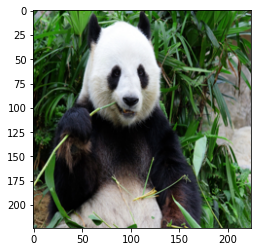

In [22]:
#3차원 텐서

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

panda=np.array(Image.open('./datasets/panda.jpg').resize((224,224)))
panda_tensor=torch.from_numpy(panda)
panda_tensor.size()

plt.imshow(panda)
plt.imshow(panda_tensor)

In [25]:
#텐서 슬라이싱

sales=torch.FloatTensor([1000.0,323.2,333.4,444.5,1000.0,323.2,333.4,444.5])

sales[:5]

sales[:-5]

tensor([1000.0000,  323.2000,  333.4000])

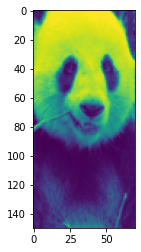

In [35]:
#판다 다루기

plt.imshow(panda_tensor[:,:,0].numpy())

plt.imshow(panda_tensor[25:175,60:130,0].numpy())

In [38]:
#텐서 요소 선택

sales=torch.eye(3,3)
sales[0,1]

tensor(0.)

In [39]:
#4차원 텐서

cat_imgs = np.array([np.array(Image.open(cat).resize((224,224))) for cat in
cats[:64]])
cat_imgs = cat_imgs.reshape(-1,224,224,3)
cat_tensors = torch.from_numpy(cat_imgs)
cat_tensors.size()

NameError: name 'cats' is not defined

In [42]:
#텐서 연산

a=torch.rand(2,2)
b=torch.rand(2,2)
c=a+b
d=torch.add(a,b)
print(a.add_(5))
print(a*b)
print(a.mul(b))
print(a.mul_(b))

tensor([[5.9080, 5.5120],
        [5.3068, 5.3863]])
tensor([[2.3365, 2.6801],
        [0.8593, 2.8044]])
tensor([[2.3365, 2.6801],
        [0.8593, 2.8044]])
tensor([[2.3365, 2.6801],
        [0.8593, 2.8044]])


In [50]:
#gpu 연산(not)
import time

a=torch.rand(10000,10000)
b=torch.rand(10000,10000)

start=time.time()
a.matmul(b)

print('time :',time.time()-start)

time : 1.0608429908752441


In [51]:
#gpu
from torch import cuda
start=time.time()
a=a.cuda()
b=b.cuda()

a.matmul(b)

print('time :',time.time()-start)

time : 0.12282538414001465


In [56]:
#Variable
from torch.autograd import Variable

x=Variable(torch.ones(2,2),requires_grad=True)
y=x.mean()

y.backward()

x.grad

x.grad_fn

x.data

y.grad_fn

In [57]:
#신경망에 사용할 데이터 생성하기

def get_data():
    train_X=np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    
    dtype=torch.FloatTensor
    
    X=Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y=Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return X,y

In [61]:
#학습 파라미터 생성

def get_weights():
    w=Variable(torch.randn(1),requires_grad=True)
    b=Variable(torch.randn(1),requires_grad=True)
    return w,b

In [62]:
#네트워크 구현

def simple_network(x):
    y_pred=torch.matmul(x,w)+b
    return y_pred

In [63]:
#파이토치 신경망 구현

import torch.nn as nn

f=nn.Linear(17,1)
f

Linear(in_features=17, out_features=1, bias=True)

In [64]:
#오차 함수 구현
#pow : 제곱

def loss_fn(y,y_pred):
    loss=(y_pred,y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_() #이전 계산된 기울기 삭제
        
    loss.backward() #학습 파라미터w,b의 변화정도를 기울기로 계산
    return loss.data[0]

In [65]:
#신경망 최적화

def optimize(learning_rate):
    w.data-=learning_rate*w.grad.data
    b.data-=learning_rate*b.grad.data


In [66]:
#데이터 로딩

from torch.utils.data import Dataset

class DogsAndCatsDataset(Dataset):
    def __init__(self,):
        pass
    def __len__(self):
        pass
    def __getitem__(self,idx):
        pass

In [67]:
class DogsAndCatsDataset(Dataset):
    
    def __init__(self,root_dir,size=(224,224)):
        self.files=glob(root_dir)
        self.size=size
        
    def __len__(self):
        return len(self,files)
    
    def __getitem(self,idx):
        img=np.asarray(Image.open(self.files[idx]).resize(self.size))
        label=self.files[idx].split('/')[-2]
        return img,label

In [69]:
#DataLoader 클래스

from torch.utils.data import Dataset,DataLoader

dataloader=DataLoader(DogsAndCatsDataset,batch_size=32,num_workers=2)